In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVR
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'Korean Data2/'
os.listdir(path)

['inp_deri_up_other_dragon[1].csv',
 'out_other_up_dragon[1].csv',
 'inp_deri_up_other_dragonfx[1].csv',
 'inp_deri_other_up_test_whole_dragon[1].csv',
 'out_other_up_test_whole_dragon[1].csv',
 'inp_deri_other_up_test_whole_dragonfx[1].csv',
 'out_other_up_test_whole_dragonfx[1].csv',
 'out_other_up_dragonfx[1].csv']

In [16]:
X_train = pd.read_csv(path+'inp_deri_up_other_dragonfx[1].csv')

y_train = pd.read_csv(path+'out_other_up_dragonfx[1].csv')
y_test = pd.read_csv(path+'out_other_up_test_whole_dragonfx[1].csv')

X_test = pd.read_csv(path+'inp_deri_other_up_test_whole_dragonfx[1].csv')
print(y_train.head())
X_train.head()

   0.33336
0  0.33467
1  0.33533
2  0.33500
3  0.33664
4  0.33927


,0.012841,0.012841.1,0.012841.2,0.012841.3,0.012841.4,0.012841.5,0.012841.6,0.012841.7,0.012841.8,0.012841.9
0,0.012199,0.011557,0.010915,0.010273,0.009631,0.008989,0.008347,0.007705,0.007063,0.006420
1,0.011894,0.010979,0.010096,0.009246,0.008427,0.007640,0.006886,0.006164,0.005474,0.004815
2,0.011696,0.010613,0.009591,0.008629,0.007725,0.006876,0.006083,0.005342,0.004653,0.004013
3,0.011550,0.010348,0.009232,0.008198,0.007242,0.006361,0.005550,0.004808,0.004129,0.003511
4,0.011434,0.010141,0.008955,0.007870,0.006880,0.005979,0.005162,0.004423,0.003757,0.003160


In [17]:
len(X_train),len(y_test),len(y_train)

(75957, 160035, 75957)

In [18]:
x_train,y_train,x_test,y_test = np.array(X_train),np.array(y_train),np.array(X_test),np.array(y_test)

In [19]:
# Random Forest
t1 = datetime.now()
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
t2 = datetime.now()
print('Time taken by Random Forest',t2-t1)
    
y1_pred = rf.predict(x_test)
y1 = y1_pred
print('Root Mean Squared error of Random Forest',sqrt(mean_squared_error(y_test,y1_pred)))

Time taken by Random Forest 0:00:58.182893
Root Mean Squared error of Random Forest 0.2167149653870647


Minimum Error = 6.661338147750939e-16
Maximum Error = 0.6139800000000031
Median Value of Error = 0.16782099999999955


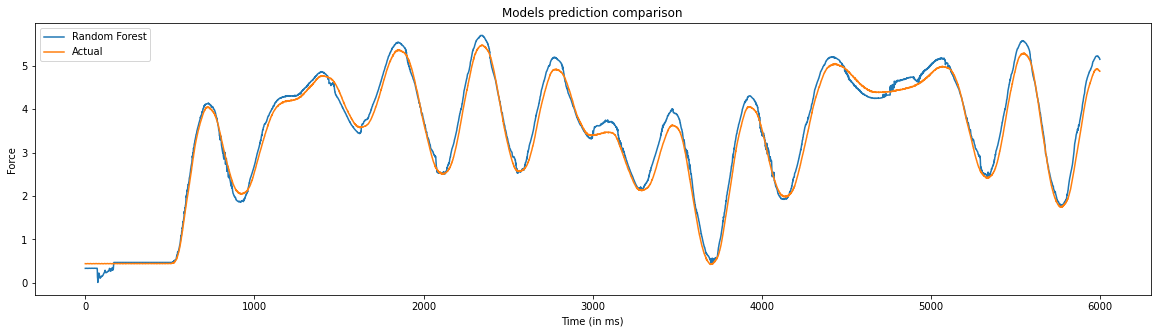

In [20]:
error = []
for i in range(len(y_test)):
    error.append(abs(y1_pred[i]-y_test[i,0]))
print('Minimum Error =',min(error))
print('Maximum Error =',max(error))
error1 = sorted(error)
print('Median Value of Error =',error1[len(error)//2])
    
# COMPARISON
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y1[:6000], label = 'Random Forest')
plt.plot(list(range(6000)),y_test[:6000], label = 'Actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Models prediction comparison')
plt.show()

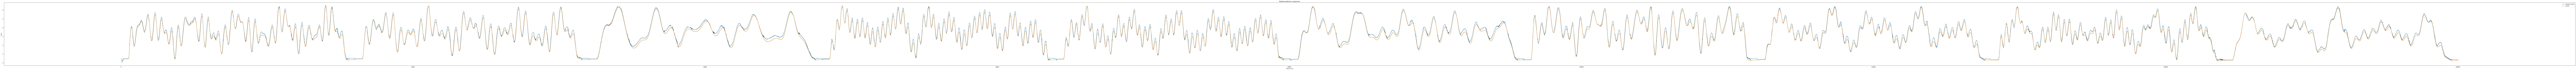

In [21]:
plt.figure(figsize=(400,10))
plt.plot(list(range(160034)),y1[:160034], label = 'Random Forest')
plt.plot(list(range(160034)),y_test[:160034], label = 'Actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Models prediction comparison')
plt.savefig('RF_korean_dragonfx.jpg')
plt.savefig('RF_korean_dragonfx.svg')
plt.show()

In [22]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
t1 = datetime.now()
cat.fit(x_train,y_train)
t2 = datetime.now()

Learning rate set to 0.081154
0:	learn: 1.5110910	total: 9.41ms	remaining: 9.41s
1:	learn: 1.3909821	total: 14.6ms	remaining: 7.27s
2:	learn: 1.2810495	total: 23ms	remaining: 7.63s
3:	learn: 1.1806820	total: 32.1ms	remaining: 7.99s
4:	learn: 1.0872739	total: 37.4ms	remaining: 7.44s
5:	learn: 1.0012670	total: 42.2ms	remaining: 7s
6:	learn: 0.9226788	total: 46.8ms	remaining: 6.64s
7:	learn: 0.8499122	total: 53.4ms	remaining: 6.63s
8:	learn: 0.7831324	total: 58.1ms	remaining: 6.4s
9:	learn: 0.7217827	total: 62.4ms	remaining: 6.18s
10:	learn: 0.6650295	total: 67.2ms	remaining: 6.04s
11:	learn: 0.6130332	total: 72.8ms	remaining: 5.99s
12:	learn: 0.5655603	total: 78.1ms	remaining: 5.93s
13:	learn: 0.5219105	total: 84.7ms	remaining: 5.96s
14:	learn: 0.4816411	total: 89.3ms	remaining: 5.86s
15:	learn: 0.4444687	total: 96.3ms	remaining: 5.92s
16:	learn: 0.4101653	total: 101ms	remaining: 5.83s
17:	learn: 0.3788899	total: 114ms	remaining: 6.24s
18:	learn: 0.3502020	total: 119ms	remaining: 6.17s
1

In [23]:
print('Time taken by Cat Boosting:',t2-t1)

y_pred = cat.predict(x_test)
print('Root mean square error of Cat Boost Model: ',sqrt(mean_squared_error(y_test,y_pred)))

Time taken by Cat Boosting: 0:00:05.906375
Root mean square error of Cat Boost Model:  0.20939487888571826


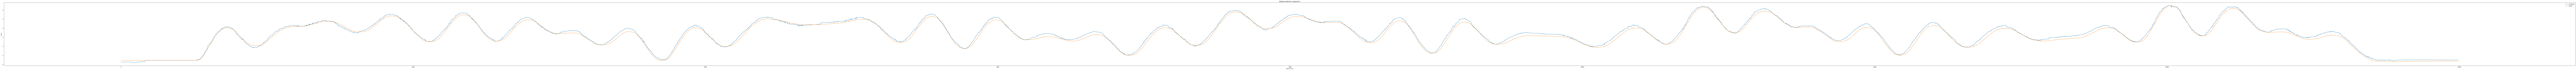

In [24]:
plt.figure(figsize=(400,10))
plt.plot(list(range(15994)),y_pred[:15994], label = 'Cat Boost')
plt.plot(list(range(15994)),y_test[:15994], label = 'Actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Models prediction comparison')
plt.savefig('catboost_korean_dragonfx.jpg')
plt.savefig('catboost_korean_dragonfx.svg',format = 'svg')
plt.show()

In [25]:
import pickle
filename = 'catboost_dragonfx.sav'
pickle.dump(cat, open(filename, 'wb'))

In [26]:
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(x_test)
print('Root mean square error of Cat Boost Model: ',sqrt(mean_squared_error(y_test,y_pred)))

Root mean square error of Cat Boost Model:  0.20939487888571826
